In [70]:
import pandas as pd 
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Neural Nets implementation

In [23]:
# Prepare data
words = open('names.txt','r').read().split()


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [49]:
# Creating stoi

alp=sorted(list(set(str(words))))
alp_rectified=alp[5:] # Removing special characters
alp_rectified.insert(0, '.')
stoi={s:i for i,s in enumerate(alp_rectified) }


In [61]:
def create_input_data(words,n=None):
    xs=[]
    ys=[]
    if n==None:
        n=len(words)
    for w in words[:n]:
        chs=['.']+list(w) +['.']
        for ch1, ch2 in zip(chs,chs[1:]):
            ix1=stoi[ch1]
            ix2=stoi[ch2]
            print(ch1,ch2)
            xs.append(ix1)
            ys.append(ix2)
        # print(chs)

    xs=torch.tensor(xs)
    ys=torch.tensor(ys)
    return(xs,ys)

In [62]:
(xs,ys)=create_input_data(words,n=1)

. e
e m
m m
m a
a .


In [77]:
xenc=F.one_hot(xs,num_classes=27).float()
yenc=F.one_hot(ys,num_classes=27).float()


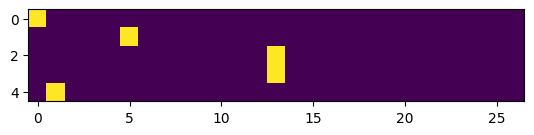

In [78]:
plt.imshow(xenc)

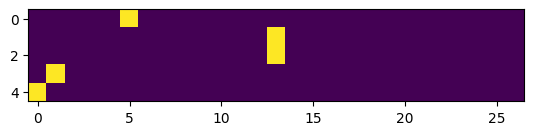

In [79]:
plt.imshow(yenc)

In [80]:
yenc.dtype

torch.float32

In [115]:
g=torch.Generator().manual_seed(2147483647)
W=torch.randn((27,27),generator=g,requires_grad=True)

In [146]:
#Forward pass
W.data-=0.1*W.grad
xenc=F.one_hot(xs,num_classes=27).float()
logits = xenc @ W # predict log counts 
counts = logits.exp() # counts
probs=counts/ counts.sum(1,keepdim=True)
loss=-probs[torch.arange(5), ys].log().mean()
loss

tensor(3.5113, grad_fn=<NegBackward0>)

In [130]:
loss

tensor(3.6691, grad_fn=<NegBackward0>)

In [145]:
W.grad=None
loss.backward()

In [104]:
# These are the probabilities that we are interested and we want to maximise these 
probs[0,5], probs[1,13], probs[2,13],probs[3,1], probs[4,0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [105]:
probs[torch.arange(5), ys] # same as above cell

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [112]:
loss=-probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)

# Exploration

In [ ]:
probs.sum(1,keepdim=True)

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

# Exploration old

In [1]:
words = open('names.txt','r').read().split()

In [2]:
len(words)

32033

In [3]:
max([len(w) for w in words])

15

In [11]:
b={}
for w in words:
    chs = ['<s>']+list(w)+['<e>']
    # print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram=(ch1, ch2)
        b[bigram]=b.get(bigram,0)+1

In [12]:
b.items()

dict_items([(('<s>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<e>'), 6640), (('<s>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<s>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<s>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<s>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<s>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<e>'), 3983), (('<s>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<s>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<e>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [13]:
sorted(b.items(),key=lambda x:-x[1])

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [18]:
a=torch.zeros((28,28),dtype=torch.int32)
print(a)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
